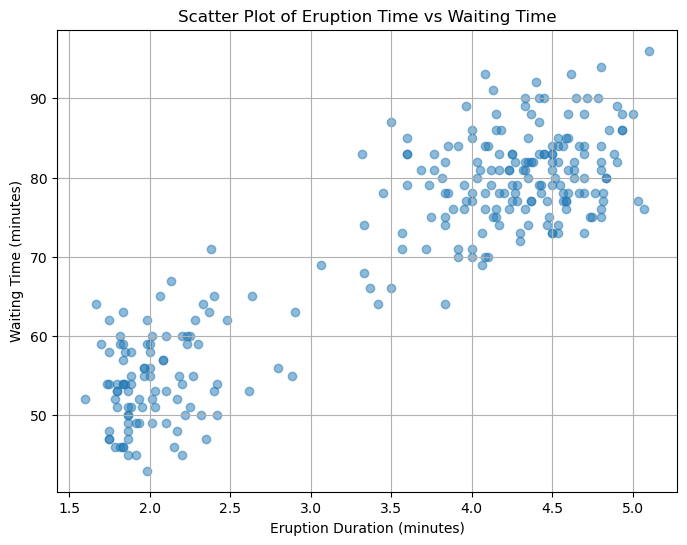

In [44]:
# 1a)
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\Shalini\IS733\HW3\faithful.csv')

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], alpha=0.5)
plt.title('Scatter Plot of Eruption Time vs Waiting Time')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


1b) From the above plot it clear that there are 2 clusters

1c)A hierarchical clustering algorithm builds a hierarchy of clusters, and can be divided into two main types:

Agglomerative Clustering (bottom-up approach):

Start by treating each data point as its own cluster.
Iteratively merge the closest clusters together based on a distance measure (e.g., Euclidean distance) until all points are in a single cluster.
This can be visualized using a dendrogram, which shows the merging process and helps decide the number of clusters.
Divisive Clustering (top-down approach):

Start with all points in a single cluster and iteratively split the clusters based on some criterion until each point is its own cluster.

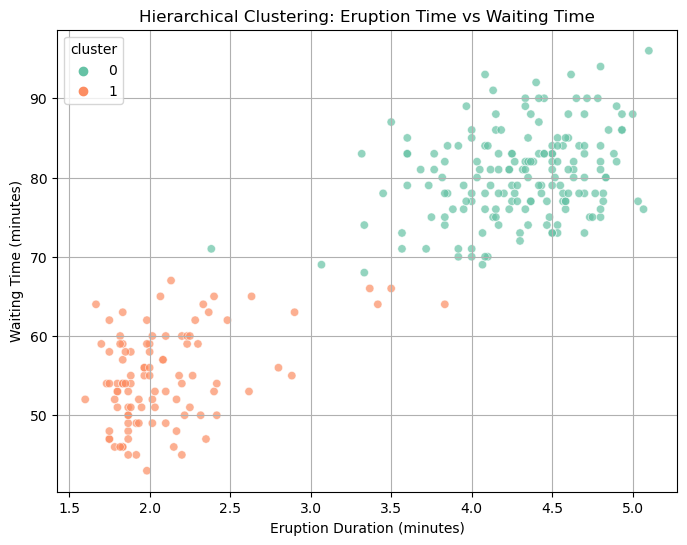

In [45]:
# 1d)
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Performing Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=2)  
data['cluster'] = model.fit_predict(data[['eruptions', 'waiting']])

# Create scatter plot with clusters labeled
plt.figure(figsize=(8, 6))
sns.scatterplot(x='eruptions', y='waiting', hue='cluster', data=data, palette='Set2', alpha=0.7)
plt.title('Hierarchical Clustering: Eruption Time vs Waiting Time')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


# Problem 2

In [46]:
# 2a)
import numpy as np
import matplotlib.pyplot as plt

def k_means(data, k, max_iters=100, tol=1e-4):
    
    # Step 1: Initialize centroids randomly by selecting 'k' data points
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    obj_func = []  # To store the objective function value at each iteration
    for _ in range(max_iters):
        # Step 2: Assign each point to the closest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = np.linalg.norm(point - centroids, axis=1)  # Calculate distances to centroids
            closest_centroid = np.argmin(distances)  # Get the index of the closest centroid
            clusters[closest_centroid].append(point)
        
        # Step 3: Recalculate centroids
        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i] 
                                  for i, cluster in enumerate(clusters)])
        
        # Calculate the change in centroids
        centroid_shift = np.sum(np.linalg.norm(new_centroids - centroids, axis=1))
        
        # Add the objective function value (sum of squared distances)
        obj_func.append(np.sum([np.sum(np.linalg.norm(cluster - centroids[i], axis=1)**2) 
                               for i, cluster in enumerate(clusters)]))
        
        # If centroids do not change significantly, we have converged
        if centroid_shift < tol:
            break
        
        centroids = new_centroids  # Update centroids for the next iteration
    
    return centroids, clusters, obj_func


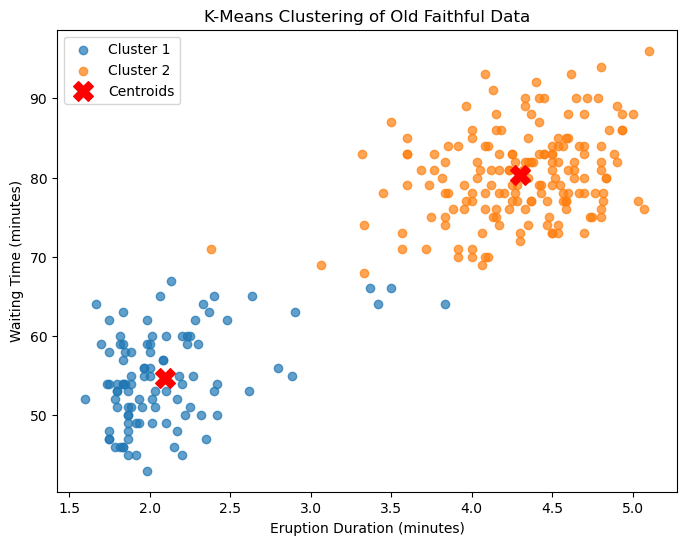

In [47]:
# 2b)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\Shalini\IS733\HW3\faithful.csv')

# Convert data to numpy array and ignore the first column if it is an ID column
X = data.values

# Function for K-means implementation
def k_means(data, k, max_iters=100, tol=1e-4):
    
    # Step 1: Initialize centroids randomly by selecting 'k' data points
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    # To store the objective function value at each iteration
    obj_func = []
    
    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = [data[np.argmin(distances, axis=1) == i] for i in range(k)]
        
        # Step 3: Recompute centroids as the mean of the assigned points
        new_centroids = []
        for cluster in clusters:
            if len(cluster) > 0:
                new_centroids.append(cluster.mean(axis=0))
            else:
                new_centroids.append(centroids[len(new_centroids)])  # Reassign centroid to previous if empty
        
        new_centroids = np.array(new_centroids)
        
        # Calculate the objective function (sum of squared distances)
        obj_value = np.sum(np.min(distances, axis=1) ** 2)
        obj_func.append(obj_value)
        
        # Check for convergence (if centroids do not change significantly)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        
        centroids = new_centroids
    
    return centroids, clusters, obj_func

# Perform k-means clustering with 2 clusters (as identified in Problem 1)
k = 2
centroids, clusters, obj_func = k_means(X, k)

# Plot the clusters with color-coding
plt.figure(figsize=(8, 6))

# Plot each cluster with a different color
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}', alpha=0.7)

# Plot the centroids
centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

plt.title("K-Means Clustering of Old Faithful Data")
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.legend()
plt.show()


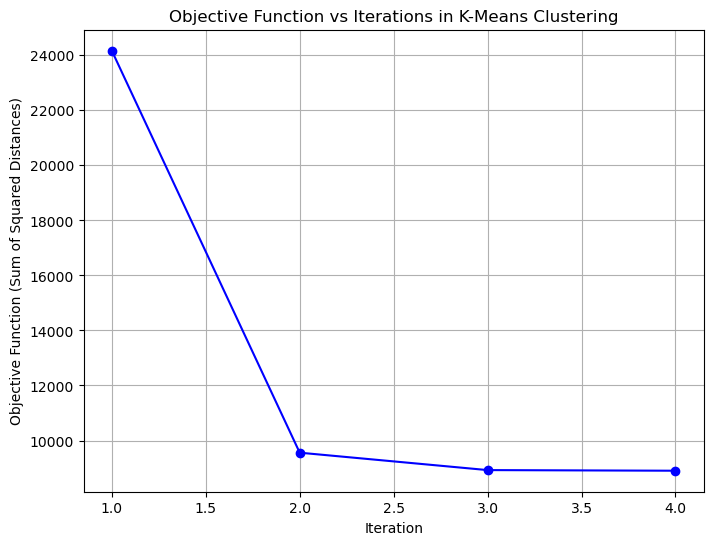

In [48]:
# 2c)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv(r'C:\Users\Preetham Madhamsetty\Desktop\Shalini\IS733\HW3\faithful.csv')

# Convert data to numpy array and ignore the first column if it is an ID column
X = data.values

# Function for K-means implementation
def k_means(data, k, max_iters=100, tol=1e-4):
    """
    K-Means Clustering algorithm implementation.
    """
    # Step 1: Initialize centroids randomly by selecting 'k' data points
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    # To store the objective function value at each iteration
    obj_func = []
    
    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        clusters = [data[np.argmin(distances, axis=1) == i] for i in range(k)]
        
        # Step 3: Recompute centroids as the mean of the assigned points
        new_centroids = np.array([cluster.mean(axis=0) if len(cluster) > 0 else centroids[i] 
                                  for i, cluster in enumerate(clusters)])
        
        # Calculate the objective function (sum of squared distances)
        obj_value = np.sum(np.min(distances, axis=1) ** 2)
        obj_func.append(obj_value)
        
        # Check for convergence (if centroids do not change significantly)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        
        centroids = new_centroids
    
    return centroids, clusters, obj_func

# Perform k-means clustering with 2 clusters (as identified in Problem 1)
k = 2
centroids, clusters, obj_func = k_means(X, k)

# Plot the objective function vs. iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(obj_func) + 1), obj_func, marker='o', color='b')
plt.title("Objective Function vs Iterations in K-Means Clustering")
plt.xlabel("Iteration")
plt.ylabel("Objective Function (Sum of Squared Distances)")
plt.grid(True)
plt.show()


2d)By running the algorithm multiple times with different initializations (using techniques like K-means to initialize the centroids in a smarter way), the final clustering results became more consistent. K-means improves the initialization process by selecting initial centroids that are farther apart from each other, which helps to reduce the likelihood of poor clustering results.